In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\data science\project\salary_data_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_ln,R_ln,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,1,0,0,1,data scientist,Nan,2555,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,1,0,0,0,data scientist,Nan,4828,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,1,1,0,1,data scientist,Nan,3495,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,1,0,0,0,data scientist,Nan,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,1,0,0,1,data scientist,Nan,2748,3


In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manger'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'Nan'
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower():
        return 'jr'
    else:
        return 'Nan'    

In [6]:
df['job_simp']=df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist      279
Nan                 184
data engineer       119
analyst             102
manger               22
machine learning     22
director             14
Name: job_simp, dtype: int64

In [7]:
df['seniority']=df['Job Title'].apply(seniority)
df['seniority'].value_counts()

Nan       520
senior    220
jr          2
Name: seniority, dtype: int64

In [8]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [9]:
df.job_state=df.job_state.apply(lambda x: x.strip() if x.strip().lower() !='los angeles' else 'LA')
df['job_state'].value_counts()

CA    151
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
LA      5
CT      5
IA      5
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [10]:
df['desc_len']=df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [11]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [12]:
df['num_comp']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!=-1 else 0)
df['num_comp']

0      1
1      1
2      1
3      3
4      3
      ..
737    3
738    3
739    1
740    1
741    1
Name: num_comp, Length: 742, dtype: int64

In [13]:
df['min_salary']=df.apply(lambda x: int((x.min_salary*8*365)/1000) if x.hourly==1 else x.min_salary ,axis=1)
df['max_salary']=df.apply(lambda x: int((x.max_salary*8*365)/1000) if x.hourly==1 else x.max_salary ,axis=1)

In [14]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,49,70
177,1,61,99
197,1,52,73
202,1,61,99
210,1,43,73
246,1,49,70
271,1,61,99
337,1,52,73
345,1,70,113
357,1,61,99


In [16]:
df['Job Description']=df['Job Description'].apply(lambda x: x.strip().replace('\n',''))
df['company_txt']=df['company_txt'].apply(lambda x: x.strip().replace('\n',''))

In [17]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_ln,R_ln,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,75.307278,129.025606,100.626011,0.557951,48.456873,0.528302,1.0,0.225067,0.237197,0.522911,3910.172507,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.533934,44.214947,38.855948,0.496965,53.900445,0.499535,0.0,0.417908,0.425651,0.499812,1533.827777,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,53.250000,97.000000,73.500000,0.000000,13.000000,0.000000,1.0,0.000000,0.000000,0.000000,2834.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,71.000000,124.000000,97.500000,1.000000,26.000000,1.000000,1.0,0.000000,0.000000,1.000000,3781.500000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,1.0,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.0,1.000000,1.000000,1.000000,10146.000000,4.000000


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_ln', 'R_ln',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

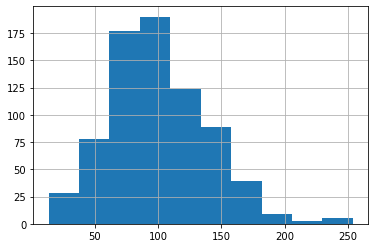

In [20]:
df.avg_salary.hist()

<AxesSubplot:>

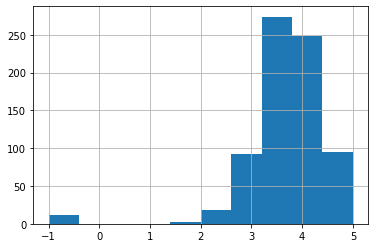

In [21]:
df.Rating.hist()

<AxesSubplot:>

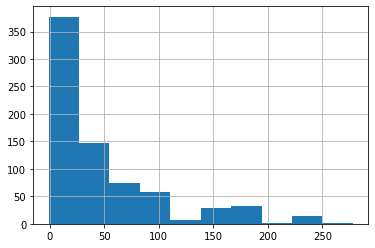

In [22]:
df.age.hist()

In [23]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
Nan,84.853261
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manger,84.022727


In [24]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp         seniority            
Nan              Nan         73.988189
                 senior     109.061404
analyst          Nan         61.155405
                 jr          56.500000
                 senior      79.092593
data engineer    Nan         96.701220
                 senior     124.689189
data scientist   Nan        107.043011
                 jr         106.500000
                 senior     138.956522
director         Nan        168.607143
machine learning Nan        119.133333
                 senior     142.071429
manger           Nan         84.022727

In [27]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary')

avg_salary
job_state job_simp                    
AL        Nan                43.750000
          analyst            62.200000
          data engineer      65.000000
AZ        Nan               124.500000
          analyst            55.000000
          data engineer      79.500000
          data scientist     69.500000
CA        Nan                99.907407
          analyst            85.250000
          data engineer     129.540000
          data scientist    143.044776
          machine learning  177.300000
          manger             80.611111
CO        Nan                31.500000
          analyst            29.500000
          data engineer      99.000000
          data scientist    108.666667
          machine learning  100.500000
CT        Nan                62.500000
          data scientist     84.000000
DC        analyst            63.500000
          data engineer      85.000000
          data scientist    149.000000
DE        Nan                27.500000
FL        analyst            47.500000
          data engineer      91.833333
          data scientist     97.357143
GA        Nan                80.000000
          data scientist     81.333333
IA        analyst            43.000000
          data engineer     102.833333
ID        analyst            56.250000
IL        Nan                57.166667
          analyst            66.500000
          data engineer      96.125000
          data scientist    117.233333
          director          221.750000
          machine learning  133.000000
IN        Nan                69.000000
          data engineer     114.500000
          data scientist     84.500000
KS        machine learning   87.000000
KY        Nan               103.500000
          data scientist     84.000000
LA        Nan                20.000000
          analyst            48.000000
          data engineer      70.500000
          data scientist    107.500000
MA        Nan               107.478261
          analyst            59.125000
          data engineer     107.291667
          data scientist    113.750000
          director          117.833333
          manger             71.900000
MD        Nan                88.750000
          analyst            80.666667
          data engineer     109.000000
          data scientist    109.115385
MI        data scientist    106.625000
          manger             87.500000
MN        analyst            76.000000
          data engineer      95.000000
MO        Nan                72.333333
          analyst            61.000000
          data scientist    127.666667
          manger             40.500000
NC        Nan                90.916667
          data engineer     104.250000
          data scientist    117.000000
NE        Nan                41.000000
NJ        Nan                82.500000
          analyst            83.583333
          data engineer     112.000000
          data scientist    106.875000
          director          161.500000
          manger            109.500000
NM        data scientist     74.333333
NY        Nan                81.583333
          analyst            65.607143
          data engineer      86.375000
          data scientist    115.250000
          machine learning  125.000000
OH        Nan                91.166667
          analyst            53.875000
          data scientist    105.285714
OR        data engineer      73.000000
          data scientist     98.500000
PA        Nan                76.062500
          analyst            62.750000
          data engineer      91.500000
          data scientist    113.333333
          machine learning  120.500000
          manger            109.666667
RI        analyst           100.000000
SC        Nan                60.500000
TN        analyst            13.500000
          data engineer     100.950000
          data scientist     96.000000
TX        Nan                41.285714
          data engineer     113.062500
          data scientist    100.730769
UT        a

In [29]:
pd.pivot_table(df[df['job_simp']=='data scientist'], index=['job_state'], values='avg_salary')

,avg_salary
job_state,
AZ,69.500000
CA,143.044776
CO,108.666667
CT,84.000000
DC,149.000000
FL,97.357143
GA,81.333333
IL,117.233333
IN,84.500000


In [30]:
df.to_csv('D:\\data science\\project\\EDA_data.csv',index=False)